In [2]:
import os
os.chdir("..")
os.getcwd()

'/home/twoaday/research/deep-learning/visual-fashion-item-search'

In [15]:
%matplotlib inline
import glob

import pandas as pd
from tqdm import tqdm_notebook

from commons.config import STANFORD_PRODUCT_IMAGES_FOLDER

In [7]:
result = [y for x in os.walk(STANFORD_PRODUCT_IMAGES_FOLDER) for y in glob.glob(os.path.join(x[0], '*.JPG'))]
result[0]

'/run/media/twoaday/data-storag/data-sets/stanford-products-img-similarity/Stanford_Online_Products/coffee_maker_final/111741049747_9.JPG'

In [12]:
df_data_set = []
for file in tqdm_notebook(result, desc='Parsing files'):
    s = file.split('/')
    name, product = s[-1].replace('.jpg', ''), 'spd_' + s[-1].split('_')[0]
    category = s[-2].replace('_final', '')
    df_data_set.append([name, product, category, file])
df_data_set = pd.DataFrame(df_data_set)
df_data_set.columns = ['name', 'product', 'category', 'file']
df_data_set.head()

,name,product,category,file
0,111741049747_9.JPG,spd_111741049747,coffee_maker,/run/media/twoaday/data-storag/data-sets/stanf...
1,111720074279_5.JPG,spd_111720074279,coffee_maker,/run/media/twoaday/data-storag/data-sets/stanf...
2,151745457215_0.JPG,spd_151745457215,coffee_maker,/run/media/twoaday/data-storag/data-sets/stanf...
3,331629102372_7.JPG,spd_331629102372,coffee_maker,/run/media/twoaday/data-storag/data-sets/stanf...
4,281775186496_3.JPG,spd_281775186496,coffee_maker,/run/media/twoaday/data-storag/data-sets/stanf...


In [13]:
df_data_set.count()

name        120053
product     120053
category    120053
file        120053
dtype: int64

In [25]:
df_data_set.groupby('product').count().name.count()

22634

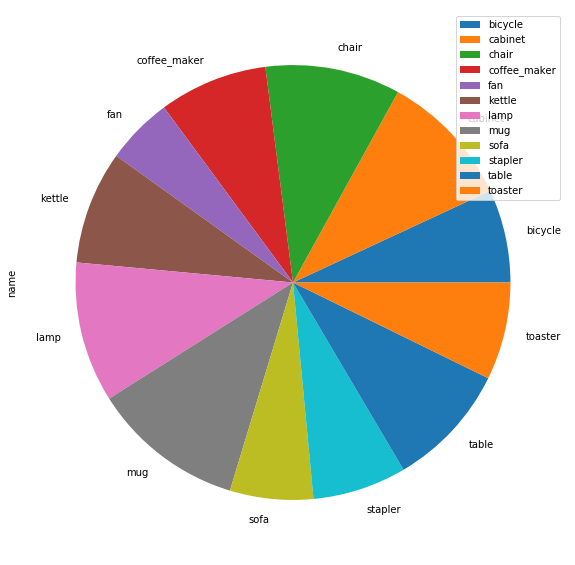

In [23]:
df_data_set.groupby('category').count().plot.pie('name', figsize=(10, 10))